In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv("./deliveries.csv")
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [8]:
df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [61]:
df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000
mean,318.281317,1.482188,10.142649,3.616483,0.000538,0.037498,0.004885,0.022232,0.004340,0.000066,1.222445,0.069022,1.291466
std,182.955531,0.501768,5.674338,1.807698,0.023196,0.257398,0.114234,0.200104,0.072652,0.018229,1.594509,0.349667,1.583240
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


Find out top 5 batsman in terms of run scored

In [62]:
df2 = df.groupby('batsman')

In [63]:
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149594,633,1,Gujarat Lions,Royal Challengers Bangalore,18,6,ER Dwivedi,DJ Bravo,CJ Jordan,0,...,0,4,0,0,0,4,4,NaN,NaN,NaN
150449,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19,2,CJ Jordan,Sachin Baby,Mustafizur Rahman,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150450,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19,3,CJ Jordan,Sachin Baby,Mustafizur Rahman,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
150451,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19,4,CJ Jordan,Sachin Baby,Mustafizur Rahman,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN


In [64]:
df2.get_group('V Kohli')

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2590,12,1,Royal Challengers Bangalore,Mumbai Indians,1,2,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
2591,12,1,Royal Challengers Bangalore,Mumbai Indians,1,3,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2593,12,1,Royal Challengers Bangalore,Mumbai Indians,1,5,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2594,12,1,Royal Challengers Bangalore,Mumbai Indians,1,6,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2597,12,1,Royal Challengers Bangalore,Mumbai Indians,2,1,V Kohli,CH Gayle,Harbhajan Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150410,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,12,5,V Kohli,AB de Villiers,Bipul Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
150413,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,13,2,V Kohli,AB de Villiers,BB Sran,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150414,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,13,3,V Kohli,AB de Villiers,BB Sran,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150415,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,13,4,V Kohli,AB de Villiers,BB Sran,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [65]:
# No of balls he has played
df2.get_group('V Kohli').shape[0]

3494

In [66]:
df2['batsman_runs'].sum()

batsman
A Ashish Reddy     280
A Chandila           4
A Chopra            53
A Choudhary         25
A Flintoff          62
                  ... 
YV Takawale        192
Yashpal Singh       47
Younis Khan          3
Yuvraj Singh      2591
Z Khan             117
Name: batsman_runs, Length: 461, dtype: int64

In [67]:
df2['batsman_runs'].sum().sort_values(ascending = False).head()

batsman
SK Raina     4548
V Kohli      4423
RG Sharma    4207
G Gambhir    4132
DA Warner    4014
Name: batsman_runs, dtype: int64

Task 2 : Find out the batsman who scored the most 4s in ten years

In [97]:
mask = df['batsman_runs']==4

In [98]:
df3 = df[mask]

In [99]:
df3.shape[0]

17033

In [100]:
df3.groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).head()

batsman
G Gambhir    484
SK Raina     402
DA Warner    401
S Dhawan     401
V Kohli      384
Name: batsman_runs, dtype: int64

In [101]:
mask2 = df['batsman_runs']==6

In [102]:
df4 = df[mask2]

In [105]:
df4.groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).head()

batsman
CH Gayle     266
SK Raina     174
RG Sharma    173
V Kohli      160
DA Warner    160
Name: batsman_runs, dtype: int64

Task3:  Against which team Virat Kohli scored highest runs

In [123]:
mask4 = df['batsman']=='V Kohli'

In [124]:
df5 = df[mask4]

In [125]:
df5.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2590,12,1,Royal Challengers Bangalore,Mumbai Indians,1,2,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
2591,12,1,Royal Challengers Bangalore,Mumbai Indians,1,3,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2593,12,1,Royal Challengers Bangalore,Mumbai Indians,1,5,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2594,12,1,Royal Challengers Bangalore,Mumbai Indians,1,6,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2597,12,1,Royal Challengers Bangalore,Mumbai Indians,2,1,V Kohli,CH Gayle,Harbhajan Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [130]:
df5.groupby('bowling_team')['total_runs'].count().sort_values(ascending= False).head()

bowling_team
Chennai Super Kings      570
Delhi Daredevils         485
Kings XI Punjab          388
Mumbai Indians           366
Kolkata Knight Riders    331
Name: total_runs, dtype: int64

In [13]:
def highest_run(str):
    mask_2 = df['batsman']==str
    df_2 = df[mask_2]
    return df_2.groupby('bowling_team')['total_runs'].count().sort_values(ascending= False).head()

In [24]:
import matplotlib.pyplot as plt


<Axes: ylabel='total_runs'>

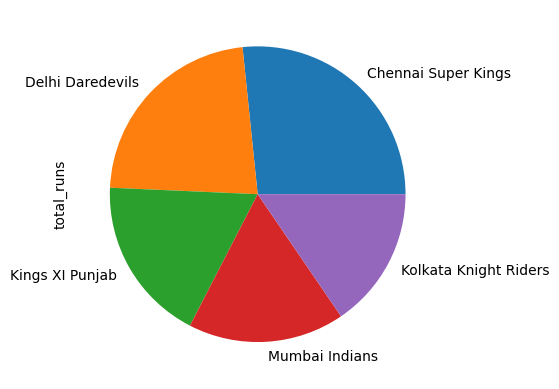

In [26]:
highest_run('V Kohli').plot(kind = 'pie')


Task 4 : Find out the dangerous batsman
1. Balls > 200
2. 16<=Overs<=20
3. Strike Rate (Balls/Runs *100)


In [73]:
df.groupby('batsman')['batsman_runs'].count()

batsman
A Ashish Reddy     196
A Chandila           7
A Chopra            75
A Choudhary         20
A Flintoff          57
                  ... 
YV Takawale        183
Yashpal Singh       67
Younis Khan          7
Yuvraj Singh      2050
Z Khan             141
Name: batsman_runs, Length: 461, dtype: int64

In [74]:
death = df[df['over']>15]

In [75]:
death

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
93,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,1,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
94,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
95,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,3,Yuvraj Singh,DJ Hooda,YS Chahal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
96,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,4,DJ Hooda,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
97,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,5,Yuvraj Singh,DJ Hooda,YS Chahal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [76]:
all_batsman = death.groupby('batsman')['batsman_runs'].count()

In [78]:
x = all_batsman>200

In [79]:
all_batsman[x].shape

(43,)

In [80]:
all_batsman[x].values

array([ 225,  570,  289,  268,  229,  425,  385,  360,  228,  409,  234,
        246,  418,  465,  425,  231,  518,  294,  838,  463,  338,  204,
        224,  423, 1224,  304,  268,  311,  235,  576,  748,  275,  283,
        243,  458,  316,  300,  218,  546,  295,  260,  584,  516],
      dtype=int64)

Task : We need to find out the leading run scorer of each IPL tournament